<a href="https://colab.research.google.com/github/nataliarestrada/IPDI-Estrada/blob/main/PDI_TP5_Estrada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo Practico N°5 - Procesamiento morfológico
Asignatura: **Introducción al Procesamiento Digital de Imágenes (PDI)**

Alumno: **Natalia R. Estrada** - email: nataliarominaestrada@gmail.com

Desarrollar un aplicativo que implemente los conceptos de morfología en niveles de
gris aquí descriptos, con un elemento estructurante 3x3. El mismo incluirá las
siguientes funciones:
- Erosión (tomar el mínimo valor de luminancia de la vecindad).
- Dilatación (máximo)
- Apertura
- Cierre
- Borde morfológico
- Mediana

Incluir la capacidad de copiar la componente de la imagen procesada en la
componente original, para poder aplicar dos o más filtrados en secuencia. 


###Desarrollo
####Importamos las librerias necesarias

In [6]:
import os
import numpy as np
import imageio as io
import matplotlib.pyplot as plt
from google.colab import files
import ipywidgets as widgets
from IPython.display import display

####Funciones necesarias para realizar las operaciones

In [11]:
#Función para convertir una imagen del espacio RGB al YIQ
def rgb_to_yiq(RGB):
    '''
    input: matriz de la imagen en formato RGB normalizada
    output: matriz de la imagen en formato YIQ
    '''
    rgb2yiq_matrix = np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
    #print("Matriz de conversion RGB a YIQ:")
    #print(rgb2yiq_matrix)

    #Se normalizan los valores de RGB entre 0.0 y 1.0
    RGB = RGB/255 

    Y = rgb2yiq_matrix[0][0] * RGB[:,:,0] + rgb2yiq_matrix[0][1] * RGB[:,:,1] + rgb2yiq_matrix[0][2] * RGB[:,:,2]
    I = rgb2yiq_matrix[1][0] * RGB[:,:,0] + rgb2yiq_matrix[1][1] * RGB[:,:,1] + rgb2yiq_matrix[1][2] * RGB[:,:,2]
    Q = rgb2yiq_matrix[2][0] * RGB[:,:,0] + rgb2yiq_matrix[2][1] * RGB[:,:,1] + rgb2yiq_matrix[2][2] * RGB[:,:,2]

    Y = np.clip(Y, 0, 1)
    I = np.clip(I, -0.5957, 0.5957)
    Q = np.clip(Q, -0.5226, 0.5226)
    
    YIQ = np.dstack((Y,I,Q))
    
    return YIQ

def erosion (yiq):
    elm=np.ones((3,3)) #creación del elemento estructurante
    he,we=elm.shape
    
    apoyoX=(he-1)//2 #defino el punto de apoyo del elemento estructurante
    apoyoY=(we-1)//2
    
    img = np.pad(yiq[:,:],[(apoyoX,apoyoX),(apoyoY,apoyoY)],'edge') #redefino los bordes según el tamaño del estructurante
        
    h,w=yiq[:,:].shape #procedimiento de erosión de la imagen
    img_eros=np.zeros(yiq[:,:].shape)
    for x in range (h):
        for y in range (w):
            n=np.nanmin(img[x:x+he,y:y+we]*elm[:,:])
            img_eros[x,y]=n
    return img_eros

def dilatacion (yiq):
    elm=np.ones((3,3)) #creación del elemento estructurante
    he,we=elm.shape
    
    apoyoX=(he-1)//2 #defino el punto de apoyo del elemento estructurante
    apoyoY=(we-1)//2
    
    img = np.pad(yiq[:,:],[(apoyoX,apoyoX),(apoyoY,apoyoY)],'edge') #redefino los bordes según el tamaño del estructurante
        
    h,w=yiq[:,:].shape #procedimiento de dilatación de la imagen
    img_dil=np.zeros(yiq[:,:].shape)
    for x in range (h):
        for y in range (w):
            n=np.nanmax(img[x:x+he,y:y+we]*elm[:,:])
            img_dil[x,y]=n
    return img_dil

def mediana (yiq):
    elm=np.ones((3,3)) #creación del elemento estructurante
    he,we=elm.shape
    
    apoyoX=(he-1)//2 #defino el punto de apoyo del elemento estructurante
    apoyoY=(we-1)//2
    
    img = np.pad(yiq[:,:],[(apoyoX,apoyoX),(apoyoY,apoyoY)],'edge') #redefino los bordes según el tamaño del estructurante
        
    h,w=yiq[:,:].shape #procedimiento de mediana de la imagen
    img_med=np.zeros(yiq[:,:].shape)
    for x in range (h):
        for y in range (w):
            n=np.nanmedian(img[x:x+he,y:y+we]*elm[:,:])
            img_med[x,y]=n
    return img_med

#Función para plotear una imagen
def plot_image(image, title, figsize=(10,6)):
  fig, axs = plt.subplots(figsize=figsize)
  plt.imshow(image, cmap='gray')
  plt.title(title, fontsize=14)
  plt.axis('off')

#Función para plotear dos imágenes
def plot_2images(image, title_1, image_mod, title_2, figsize=(17,7)):
  fig, axs = plt.subplots(1,2,figsize=figsize)

  plt.subplot(1,2,1)
  plt.imshow(image, cmap='gray')
  plt.title(title_1, fontsize=14)
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(image_mod, cmap='gray')
  plt.title(title_2, fontsize=14)
  plt.axis('off')  

  plt.show()

#Función para plotear tres imágenes
def plot_3images(image1, title_1, image2, title_2, image3, title_3, figsize=(20,8)):
  fig, axs = plt.subplots(1,3,figsize=figsize)

  plt.subplot(1,3,1)
  plt.imshow(image1, cmap='gray')
  plt.title(title_1, fontsize=20)
  plt.axis('off')

  plt.subplot(1,3,2)
  plt.imshow(image2, cmap='gray')
  plt.title(title_2, fontsize=20)
  plt.axis('off')

  plt.subplot(1,3,3)
  plt.imshow(image3, cmap='gray')
  plt.title(title_3, fontsize=20)
  plt.axis('off')  

  plt.show()

#Función para guardar una imagen
def save_image(image,path):
  image = image.astype('uint8')
  io.imsave(path,image)

#Funcion para crear un botones de guardado
def buttons(image, path, name):

  save_button = widgets.Button(description='Guardar .PNG')
  save_local_button = widgets.Button(description='Copiar')
  out = widgets.Output()

  def save_button_clicked(b):
     with out:
      #Que sucede al presionar el boton
      out.clear_output()
      save_image(image,os.path.join(path,name+'.png'))     
      print("Imagen guardada como "+name+".png")

  save_button.on_click(save_button_clicked)

  def save_local_button_clicked(b):

     global new_image
     with out:
      #Que sucede al presionar el boton
      out.clear_output()
      new_image = np.copy(image)
      print("Imagen guardada localmente")

  save_local_button.on_click(save_local_button_clicked)
  buttons = widgets.HBox([save_button, save_local_button])
  display(buttons,out)

##Bloque principal del programa.


Saving chip.bmp to chip (2).bmp


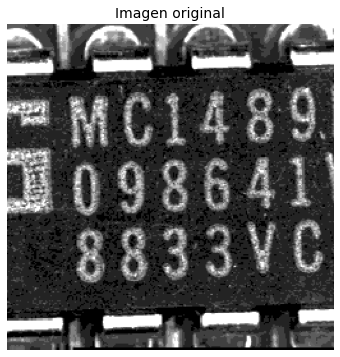

In [12]:
#@title Ingrese imagen desde su equipo: { run: "auto", vertical-output: true }
uploaded = files.upload()

for fn in uploaded.keys():
  name=fn

#Leo la imagen
img = io.imread(name)
if img.ndim <= 2:
  image = img/255
else:
  image_yiq = rgb_to_yiq(img) #pasar la imagen a espacio yiq
  image = image_yiq[:,:,0] #utilizar el canal de la luminancia

plot_image(image,'Imagen original')


👁‍🗨 Modo de uso: Seleccione la imagen a procesar y la operación. Para efectuar varias operaciones seguidas tomando la salida anterior, guardar la imagen localmente (Copiar) y en imagen seleccionar "guardada localmente" y la operación. Para guardar la imagen resultante como .PNG hacer click en "Guardar .PNG".


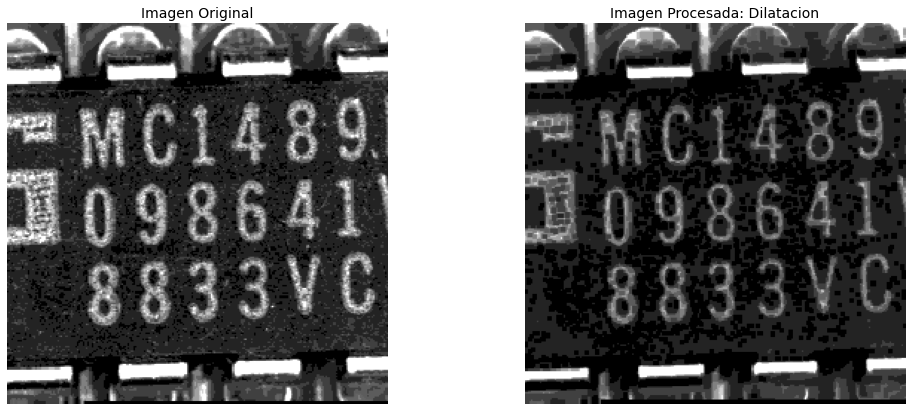

Output()

In [9]:
#@title Seleccione la imagen a analizar: { run: "auto", vertical-output: true  }

Imagen = 'ingresada' #@param ["ingresada", "guardada localmente"]

if Imagen =='ingresada':
  image_select = image
if Imagen =='guardada localmente':
  image_select = new_image


#@markdown Seleccione la operación a realizar: { run: "auto", vertical-output: true  }
Operacion =  "Erosion" #@param ["Erosion", "Dilatacion", "Apertura", "Cierre", "Borde interno", "Borde externo", "Mediana"]

if Operacion == 'Erosion':
    processed_image = erosion(image_select)
elif Operacion == 'Dilatacion':
    processed_image = dilatacion(image_select)
elif Operacion == 'Apertura':
    processed_image = dilatacion(erosion(image_select))
elif Operacion == 'Cierre':
    processed_image = erosion(dilatacion(image_select))
elif Operacion == 'Borde interno':
    processed_image = image_select - erosion(image_select)
elif Operacion == 'Borde externo':
    processed_image = dilatacion(image_select) - image_select
elif Operacion == 'Mediana':
    processed_image = mediana(image_select)

plot_2images(image_select, 'Imagen Original', processed_image, 'Imagen Procesada: '+Operacion)

#Botones de guardado
print('\n')
nombre=name[0:len(name)-3] #guardo el nombre de la imagen sin la extencion
buttons(processed_image,'/content/',nombre+Operacion)
print('\n')

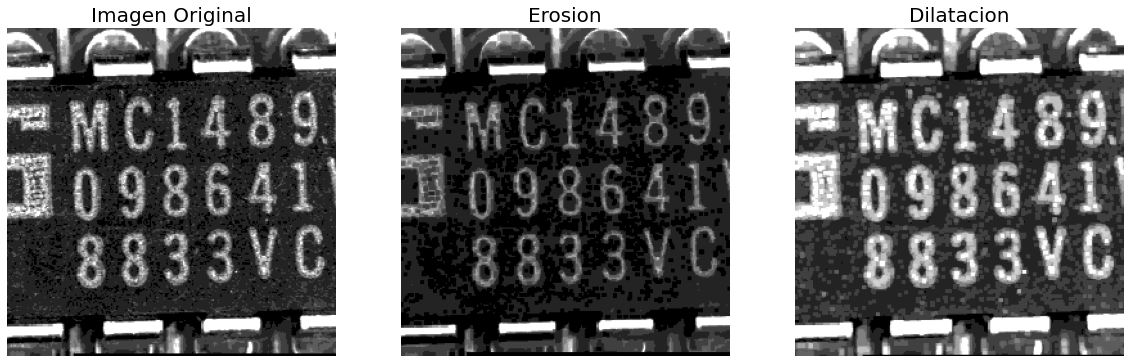

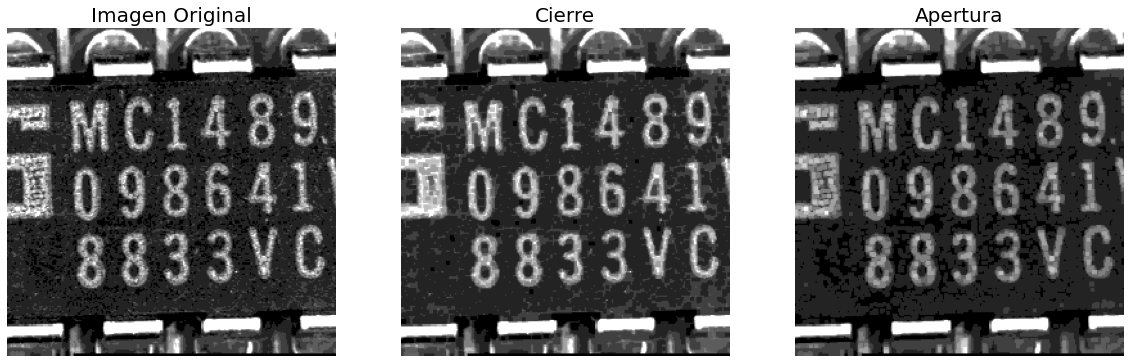

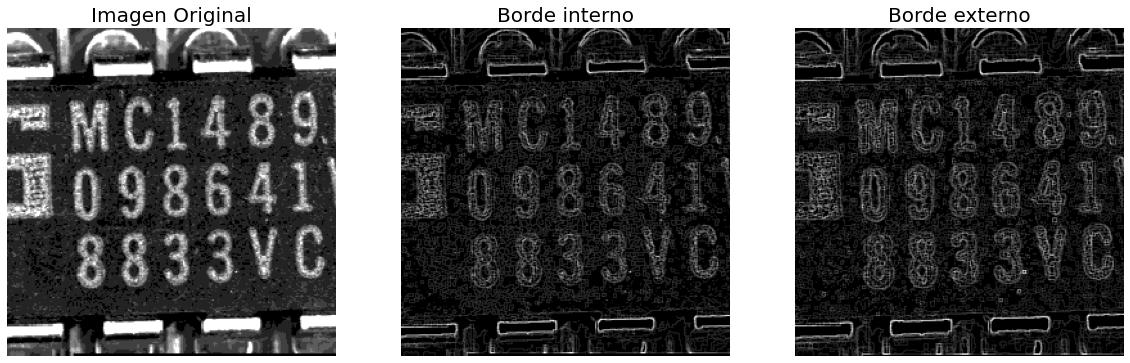

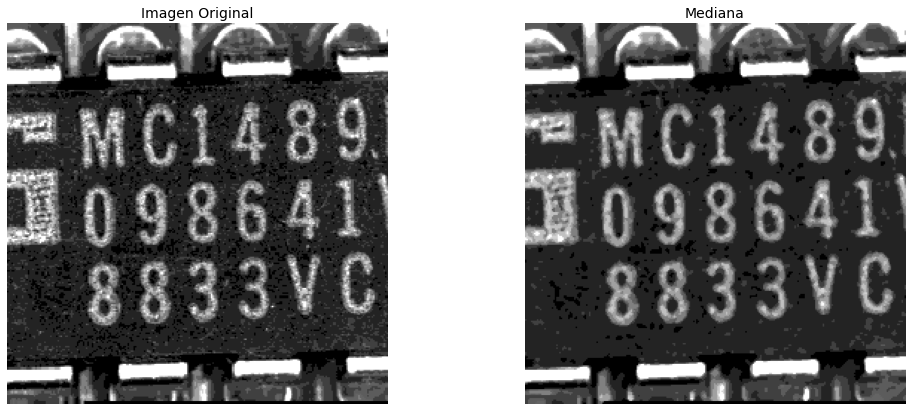

In [13]:
plot_3images(image_select, 'Imagen Original', erosion(image_select), 'Erosion', dilatacion(image_select), "Dilatacion")
print('\n')
plot_3images(image_select, 'Imagen Original', erosion(dilatacion(image_select)), 'Cierre', dilatacion(erosion(image_select)), "Apertura")
print('\n')
plot_3images(image_select, 'Imagen Original', image_select - erosion(image_select), 'Borde interno', dilatacion(image_select) - image_select, "Borde externo")
print('\n')
plot_2images(image_select, 'Imagen Original', mediana(image_select), 'Mediana')
